# Module 1 - Connecting with and Controlling KITT

Let us start with providing an overview and a brief description on getting to know the vehicle and implementing some basic control scripts. 

## Brief Overview

KITT is a remotely controlled vehicle. To allow for this remote control, a wireless link must be used.
Over this wireless link, control commands can be sent from the base station (your computer) to KITT.
This wireless link also facilitates requests for data from KITT and KITT’s data in response to these
requests.
This project requires you to maneuver KITT in all sorts of ways. In this module, you will set up a
connection to KITT and work with basic controls to allow for more advanced actions later on.
This module starts with an assignment to get to know your team, set up your development environment,
and start working with the car.

```{Note}
Approximate duration required for this module, 

Lab session hours and Preparation session
*10 hours*
```

### KITT Basics

KITT is based on a repurposed toy car model, the Traxass E-MAXX. As seen in this {ref}`KITT car <car-figure>` figure. There is a data sheet (here it is {doc}`C:\Users\aparn\mybookname\EE2L21 KITT datasheet.pdf`) as well which gives an overview of the various components, such as the motor controller, LCD status indicator, ultrasonic sensors, and, most importantly, the communication module.


```{figure} traxxas_e-maxx.png
---
height/width: 150px
name: car-figure
---
Traxass E-MAXX along with it's dimensions
```

#### Hardware

Many components are combined on a single custom-made MCU board installed on KITT. The microcontroller forms the core of this board, an NXP LPC4357 chip with an ARM CORTEX-M4/M0 core. The MCU board contains the Bluetooth module, connectors for all peripherals, and an amplifier for the audio beacon, which will be used for the localization. The following figure {ref}`Schematic Overview of KITT communication with the PC <Schematic-overview>` shows a schematic overview of the connection.

The MCU is fed from the rechargeable batteries using a buck converter that converts the voltage to *5V* DC. Using an LM1117-3.3, *3.3V* is generated.


```{figure} communication_overview.png
---
height/width: 150px
name: Schematic-overview
---
Schematic of communication with KITT and PC.
```

The Bluetooth communication with KITT consists of the following elements:

-  On car: Roving Networks RN-41 I/RM, Onboard Bluetooth module with UART control.
-  On PC: LM Technologies LM506, USB Bluetooth V4.0 dongle with Broadcom BCM20702 chipset, or the internal Bluetooth module of your laptop.

You can use your computer's internal Bluetooth connector to connect to KITT. If you want to use one of the lab computers or have trouble connecting to KITT from your PC (check if all drivers are installed), you can use the USB Bluetooth dongle. 

KITT has four LED's, see figure {ref}`KITT <KITT>`, their meaning is as follows:

```{figure} figurejoin.png
---
height/width: 80px
name: KITT
---
(KITT)
```

- Red (twice): *5V* and *20V* supply voltages are present.
- Green (blinking): Bluetooth searches for connection; (steady) Bluetooth connected.
- Yellow (blinking): Bluetooth data transfer.

The button next to the LEDs is a reset button for the MCU. This reset button allows the user to reset KITT's actions if it freezes or is unresponsive.

### Communicating with KITT

#### pySerial

pySerial is a Python module that provides a simple and efficient way to communicate with serial ports. It allows Python programs to access and manipulate the serial ports on a computer, allowing them to communicate with other devices connected to those ports. With pySerial, you can easily send and receive data to/from these devices. pySerial is cross-platform, which works on Windows, macOS, and Linux operating systems.

- *serial.Serial(port, baud rate)* - This command initializes a serial connection. The port argument specifies the serial port to use (e.g., "COM1" on Windows or "/dev/rfcomm0" on Linux),
and the baud-rate argument specifies the data rate in bits per second.
- *serial.write(data)* - This command sends data over the serial connection. The data argument is a bytes object that contains the data to be sent.
- *serial.read(size)* - This command reads a specified number of bytes from the serial connection. It blocks until the specified number of bytes is received.
- *serial.flush()* - This command is used to flush the input and output buffers of the serial connection.
- *serial.close()* - This command is used to close the serial connection.

Further more, updated information regarding the module can also be found through this link [pySerial](https://pyserial.readthedocs.io/en/latest/pyserial.html).

#### Connecting to KITT 

To start off with, connect the car to your computer over Bluetooth. Make sure you know the name of the Bluetooth port that the car is connected to. To access the link in Python use, 

```{code-cell}
serial_port = serial.Serial(comport, 115200, rtscts=True)

# example if your transmission connection to KITT takes place over port 10, 
comport = 'COM10'
```

```{important}

serial_port is an instance of pySerial and this object can be used to manipulate KITT. The variable comport is the path to the comport assigned to the Bluetooth connection with KITT. Which
comport specifically KITT is connected to can be found in your communication settings.
Further information regarding the issues with connecting to the port via Bluetooth can be solved by referring to the Appendices.

Also keep in mind, The Bluetooth connection is disturbed by leaving comports open, quitting your work without closing the communication link, removing the Bluetooth dongle, or turning off the Bluetooth connection. Avoid disturbing the Bluetooth connection by ending the connection properly before doing any of the aforementioned things. If you disturb the Bluetooth link, you may need to reboot your computer to reset the operating system, which costs you valuable lab time.

```
The connection must also be closed once you are done using the port, 

```{code-cell}
serial_port.close()

```

#### Controlling KITT

After connecting to KITT, commands are required to control it. First off, for *driving* there are 2 types of instructions:

-  A direction command.
-  A motor speed command.

These are controlled using Pulse width modulation.  Both commands are neutral at a setting of 150. The direction commands range from 200 (hard left) to 100 (hard right), and the motor commands range from 135 (backward) to 165 (forward).



In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def generate_pwm_waveform(duty_cycle, frequency=1, t_end=1, samples=1000):
    """
    Generates a PWM signal.
    Parameters:
        duty_cycle (float): The duty cycle of the PWM signal (percentage of time signal is high).
        frequency (float): The frequency of the PWM signal in Hz.
        t_end (float): The end time for the generated signal.
        samples (int): Number of samples in the generated signal.
    Returns:
        t (numpy array): Time vector.
        pwm_signal (numpy array): The PWM signal.
    """
    t = np.linspace(0, t_end, samples)
    period = 1 / frequency
    on_time = period * (duty_cycle / 100)
    pwm_signal = (t % period < on_time).astype(float)
    return t, pwm_signal

In [3]:
frequency = 1  # Hz
duty_cycles = [10, 30, 50, 70, 90]  # Different duty cycles

plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

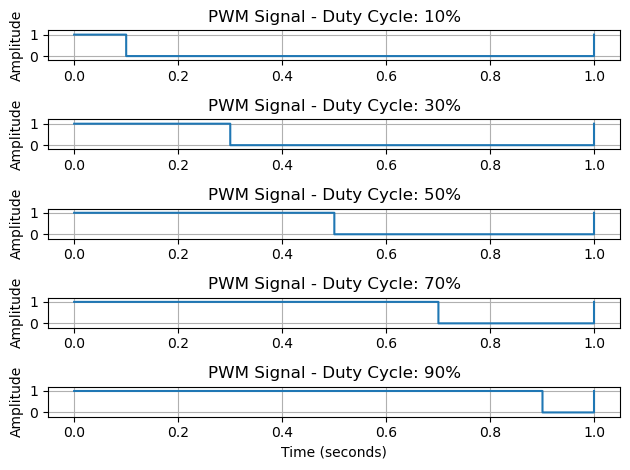

In [4]:
# Generate and plot PWM for different duty cycles
for i, duty_cycle in enumerate(duty_cycles, 1):
    t, pwm_signal = generate_pwm_waveform(duty_cycle, frequency)
    plt.subplot(len(duty_cycles), 1, i)
    plt.plot(t, pwm_signal, drawstyle='steps-post')
    plt.ylim(-0.2, 1.2)
    plt.title(f'PWM Signal - Duty Cycle: {duty_cycle}%')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.xlabel('Time (seconds)')
plt.tight_layout()
plt.show()


```{Note}

However, there is a dead zone for the motor commands, so KITT will likely not start moving forward until the PWM is set to about 153. It is recommended to experiment with these values, they are also battery-dependent. You should test the size of the drive command dead-band, verify that 150 is the middle position for steering (sometimes there is a deviation of ±2), and test the maximum left and right position.

```
All the commands are sent in binary and end with a new line character.

```{code-cell}

serial_port.write(b'code\n')

```

To set direction to 169 and motor speed to 135, it can be done as follows, 

```{code-cell}
serial_port.write(b'D169\n')
serial_port.write(b'M135\n')
```

```{attention}

Once you set the motor speed commands, KITT will continue to act on this until you either
transmit a new motor speed command or reset the MCU using the button on KITT, which will set both
direction and motor speed commands to the neutral value of 150. Do one of these two options after your
tests since KITT will keep driving if you don’t.
```

Secondly, *Audio beacon* commands used are,

```{code-cell}
# ON-OFF commands
serial_port.write(b'A1\n')
serial_port.write(b'A0\n')
```

```{caution}

Be aware that the default code word for the beacon is 0x00000000, which means KITT will not start making noise on its own when the beacon is turned on. You should specify a code as described below before you can hear the beacon make noise. Furthermore, an arbitrary carrier frequency, bit frequency and repitition count can be used. (Generally, maximum of 30 kHz)

```
```{code-cell}
# Carrier frequency set to 10000 Hz for example.

carrier_frequency = 10000.to_bytes(2, byteorder='big')
serial_port.write(b'F' + carrier_frequency + b'\n')

# Bit frequency set to 5000 Hz for example.

bit_frequency = 5000.to_bytes(2, byteorder='big')
serial_port.write(b'B' + bit_frequency + b'\n')

# Repitition count has a minimum of 32.

repetition_count = 2500.to_bytes(2, byteorder='big')
serial_port.write(b'R' + repetition_count + b'\n')

# The 32 bits code pattern is transmitted bit-wise over the beacon. Hence, code must be specified in hexadecimal.

code = 0xDEADBEEF.to_bytes(4, byteorder='big')
serial_port.write(b'C' + code + b'\n')
```
The repitition count formula is as follows, 

$$
\displaystyle
\left( Repitition count = Bit frequency/ Repitition Frequency \right)
$$

Lastly, the *status command* which requests for the status and all the data from KITT, 

```{code-cell}

serial_port.write(b'S\n')
status = serial_port.read_until(b'\x04')

```

```{Note}

The status string reports the current drive commands, the ultrasonic sensor distance (cm), the battery voltage (mV), the audio status (on/off) and control parameters (code word,carrier-frequency, bit-frequency, repetition count). A sensor distance of 999 means overload (i.e., out of range) 
Also, remember that all the numbers provided here serve only as an example. It is up to you to determine what carrier frequency, code word, etc., best fits the goal of succeeding at the final challenge.

```
#### On-Off Keying (OOK)

It is a simple form of amplitude-shift keying (ASK), which is a modulation technique used in digital communication. OOK represents digital data as the presence or absence of a carrier wave. In its simplest form, "1" is represented by the presence of the carrier (an "on" state), and "0" is represented by its absence (an "off" state).

To illustrate OOK using Python and matplotlib, I'll generate a simple OOK signal based on a digital binary input string. This example will help visualize how OOK transmits digital data.

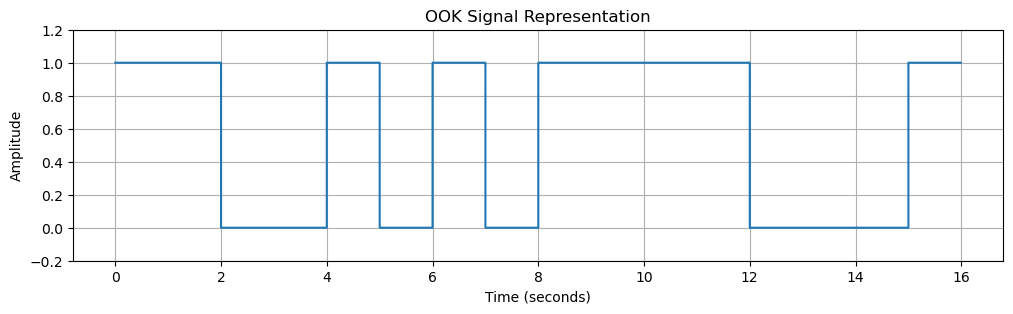

In [5]:

def generate_ook_signal(data, bit_duration=1, sampling_rate=100):
    """
    Generates an OOK signal from binary data.
    Parameters:
        data (str): Binary string to be transmitted.
        bit_duration (float): Duration of each bit in seconds.
        sampling_rate (int): Number of samples per second.
    Returns:
        t (numpy array): Time vector for the signal.
        ook_signal (numpy array): The OOK signal.
    """
    # Number of samples per bit
    samples_per_bit = int(bit_duration * sampling_rate)
    
    # Generate the signal
    ook_signal = np.repeat([int(bit) for bit in data], samples_per_bit)
    total_samples = len(ook_signal)
    t = np.linspace(0, total_samples / sampling_rate, total_samples, endpoint=False)
    
    return t, ook_signal

# Binary data to be transmitted
data = "1100101011110001"

# Generate OOK signal
t, ook_signal = generate_ook_signal(data)

# Plotting
plt.figure(figsize=(12, 3))
plt.step(t, ook_signal, where='post')
plt.ylim(-0.2, 1.2)
plt.title('OOK Signal Representation')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


<!-- As it is markdown, you can embed images, HTML, etc into your posts!

![](https://myst-parser.readthedocs.io/en/latest/_static/logo-wide.svg) -->

<!-- You can also $add_{math}$ and

$$
math^{blocks}
$$

or

$$
\begin{aligned}
\mbox{mean} la_{tex} \\ \\
math blocks
\end{aligned}
$$

But make sure you \$Escape \$your \$dollar signs \$you want to keep! -->

<!-- ## MyST markdown

MyST markdown works in Jupyter Notebooks as well. For more information about MyST markdown, check
out [the MyST guide in Jupyter Book](https://jupyterbook.org/content/myst.html),
or see [the MyST markdown documentation](https://myst-parser.readthedocs.io/en/latest/).

## Code blocks and outputs -->

### Implementing a basic KITT Control Script

You are asked to write a Python program to control your car connected over Bluetooth. The program should allow the car to be controlled using the keyboard w, a, s, and d keys. The e and q should start and stop the audio beacon. Also add a key to stop communication with KITT. The template script below will help define the class and some essential methods for communication in order for you to complete the *wasd* function. 

In [6]:

import serial
import keyboard 
import numpy as np
import matplotlib.pyplot as plt

In [7]:


class KITT:
    def __init__(self, port, baudrate=115200):
        self.serial = serial.Serial(port, baudrate, rtscts=True)
        
    def send_command(self, command):
        self.serial.write(command.encode())

    def set_speed(self, speed):
        self.send_command(f'M{speed}\n')

    def set_angle(self, angle):
        self.send_command(f'D{angle}\n')

    def stop(self):
        self.set_speed(150)
        self.set_angle(150)

    def __del__(self):
        self.serial.close()



In [8]:
def wasd(kitt):
    # add your code

    if __name__ == "__main__":
        kitt_instance = KITT("your_port_here")
        wasd(kitt_instance)

**wasd Function**

- The wasd function is designed to be a continuous loop that reads keyboard events using the keyboard library which you loaded using import keyboard.
- When a key is pressed (KEY_DOWN), the function interprets the key and adjusts KITT’s speed and
steering angle or toggles the beacon accordingly.
- The 'w' key accelerates KITT forward, 's' stops KITT, ’a’ turns KITT left, and 'd' turns KITT
right.
- The 'e' key turns on the beacon, and the 'q' key turns off the beacon.
- When a key is released (KEY_UP), you could define appropriate actions, e.g. stop KITT or reset the
steering angle.


#### Optional Extensions

If you would like to go above and beyond with the task then below listed are a few tips which can help with extending the functionality of the program,

- Add a GUI: You could create a graphical user interface (GUI) for the program to make it more user-friendly. The GUI could display information about the car, such as its speed or battery level,
and provide buttons for controlling the car. You can use the built-in tkinter module but you are free to use any other GUI module, for example PyGame, pyglet, or PyQt.
- Add error handling: Currently, if there is an error with the Bluetooth connection or the serial communication, the program will simply crash. You could add some error handling to handle
these cases more gracefully, such as printing an error message and exiting the program.
- Add speed control: Currently, the program only supports moving the car forward or backward and turning left or right. You could add support for controlling the speed of the car, such as by
sending different commands to the car depending on how long the user holds down the forward or backward keys.
- Add an emergency stop: KITT doesn’t have a brake; the 150 speed setting lets KITT roll out to standstill, which might take a long distance. Add an emergency brake by letting KITT drive
backwards for a short period of time. (You should first detect if the previous speed setting caused KITT to move forward. You need to define a state variable to memorize the speed setting.)

